In [ ]:
pip -q install transformers datasets    

     |████████████████████████████████| 3.4 MB 4.3 MB/s 
     |████████████████████████████████| 311 kB 73.4 MB/s 
     |████████████████████████████████| 596 kB 73.9 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 3.3 MB 61.6 MB/s 
     |████████████████████████████████| 895 kB 89.8 MB/s 
     |████████████████████████████████| 133 kB 84.1 MB/s 
     |████████████████████████████████| 1.1 MB 74.1 MB/s 
     |████████████████████████████████| 243 kB 86.0 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 144 kB 85.3 MB/s 
     |████████████████████████████████| 271 kB 83.4 MB/s 


In [ ]:
!nvidia-smi

Mon Jan 24 19:11:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# load tensorboard extension
%load_ext tensorboard

# Patronizing and Condescending Language Detection

##Task 2

## Prepare Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget https://gist.githubusercontent.com/Sirwe-Saeedi/ea22d87102a08df69aea188e53fa16af/raw/8a4106077c4ce731044bc8546ad795c42cfe68d0/PCL_task2_Training_Set.tsv

--2022-01-24 19:11:43--  https://gist.githubusercontent.com/Sirwe-Saeedi/ea22d87102a08df69aea188e53fa16af/raw/8a4106077c4ce731044bc8546ad795c42cfe68d0/PCL_task2_Training_Set.tsv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1342370 (1.3M) [text/plain]
Saving to: ‘PCL_task2_Training_Set.tsv’

PCL_task2_Training_ 100%[===================>]   1.28M  --.-KB/s    in 0.06s   

2022-01-24 19:11:43 (20.2 MB/s) - ‘PCL_task2_Training_Set.tsv’ saved [1342370/1342370]



In [ ]:
#Skip the disclaimer at the beginning of file
df_categories = pd.read_csv('./PCL_task2_Training_Set.tsv', sep='\t', skiprows=4, header = None)
df_categories.columns = ['par_id','art_id',	'text', 'keyword',	'country_code', 'span_start', 'span_finish', 'span_text', 'pcl_category', 'number_of_annotators']
#  number_of_annotators = 'number_of_annotators_agreeing_in_that_label'
#df_pcl.drop('index', axis = 1, inplace=True)
df_categories

,par_id,art_id,text,keyword,country_code,span_start,span_finish,span_text,pcl_category,number_of_annotators
0,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,201,236,put their situation in perspective,Authority_voice,2
1,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,240,274,help them communicate with others,Unbalanced_power_relations,2
2,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,274,300,who could provide support,Unbalanced_power_relations,1
3,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,384,434,plan for their needs and the needs of their child,Authority_voice,2
4,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,0,35,We also know that they can benefit,Unbalanced_power_relations,1
...,...,...,...,...,...,...,...,...,...,...
2755,10070,@@15573661,Fern ? ndez was a well-known philanthropist wh...,disabled,ng,0,210,Fern ? ndez was a well-known philanthropist wh...,Unbalanced_power_relations,1
2756,6484,@@2559173,"Touched much by their plight , Commanding Offi...",homeless,lk,0,29,Touched much by their plight,Compassion,1
2757,6484,@@2559173,"Touched much by their plight , Commanding Offi...",homeless,lk,31,315,Commanding Officer and all ranks of the 7 Sri ...,Unbalanced_power_relations,1
2758,6249,@@1947926,She reiterated her ministry 's commitment to p...,women,gh,153,205,gave a strong indication of hope for Ghanaian ...,Unbalanced_power_relations,1


In [ ]:
df_categories['number_of_annotators']

0       2
1       2
2       1
3       2
4       1
       ..
2755    1
2756    1
2757    1
2758    1
2759    1
Name: number_of_annotators, Length: 2760, dtype: int64

In [ ]:
df_categories['number_of_annotators'].value_counts()

2    1401
1    1359
Name: number_of_annotators, dtype: int64

In [ ]:
print(f"category_label NaN values : {df_categories['pcl_category'].isnull().sum()}")
print(f"span_tetx NaN values : {df_categories['span_text'].isnull().sum()}")

category_label NaN values : 0
span_tetx NaN values : 0


In [ ]:
# df_categories = df_categories[df_categories['pcl_category'].notna()]
# df_categories = df_categories[df_categories['span_text'].notna()]

In [ ]:
# print(f"category_label NaN values : {df_categories['pcl_category'].isnull().sum()}")
# print(f"span_tetx NaN values : {df_categories['span_text'].isnull().sum()}")

In [ ]:
a = df_categories['pcl_category'].astype('category')
df_categories['labels'] = a.cat.codes

In [ ]:
a

0                  Authority_voice
1       Unbalanced_power_relations
2       Unbalanced_power_relations
3                  Authority_voice
4       Unbalanced_power_relations
                   ...            
2755    Unbalanced_power_relations
2756                    Compassion
2757    Unbalanced_power_relations
2758    Unbalanced_power_relations
2759               Authority_voice
Name: pcl_category, Length: 2760, dtype: category
Categories (7, object): ['Authority_voice', 'Compassion', 'Metaphors', 'Presupposition',
                         'Shallow_solution', 'The_poorer_the_merrier', 'Unbalanced_power_relations']

In [ ]:
df_categories['labels']

0       0
1       6
2       6
3       0
4       6
       ..
2755    6
2756    1
2757    6
2758    6
2759    0
Name: labels, Length: 2760, dtype: int8

In [ ]:
df_categories['labels'].value_counts()

6    968
1    682
3    296
0    285
2    250
4    227
5     52
Name: labels, dtype: int64

In [ ]:
df_categories['labels'].unique()

array([0, 6, 4, 3, 1, 2, 5], dtype=int8)

In [ ]:
len(df_categories)

2760

#Test set

In [ ]:
!wget https://gist.githubusercontent.com/Sirwe-Saeedi/f04bd684ad7b43f09934658c096dc475/raw/4128a99896080a84a61fccb73d58f82eb06a3b87/TestSet_EvaluationPhase.csv

--2022-01-24 19:12:13--  https://gist.githubusercontent.com/Sirwe-Saeedi/f04bd684ad7b43f09934658c096dc475/raw/4128a99896080a84a61fccb73d58f82eb06a3b87/TestSet_EvaluationPhase.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1145277 (1.1M) [text/plain]
Saving to: ‘TestSet_EvaluationPhase.csv’

TestSet_EvaluationP 100%[===================>]   1.09M  --.-KB/s    in 0.06s   

2022-01-24 19:12:15 (17.7 MB/s) - ‘TestSet_EvaluationPhase.csv’ saved [1145277/1145277]



In [ ]:
df_pcl_test = pd.read_csv('./TestSet_EvaluationPhase.csv', sep='\t', header = None)
df_pcl_test.columns = ['index','paragraph_id',	'keyword', 'country_code',	'paragraph']
#df_pcl_test.drop('index', axis = 1, inplace=True)
df_pcl_test

,index,paragraph_id,keyword,country_code,paragraph
0,t_0,@@7258997,vulnerable,us,"In the meantime , conservatives are working to..."
1,t_1,@@16397324,women,pk,In most poor households with no education chil...
2,t_2,@@16257812,migrant,ca,The real question is not whether immigration i...
3,t_3,@@3509652,migrant,gb,"In total , the country 's immigrant population..."
4,t_4,@@477506,vulnerable,ca,"Members of the church , which is part of Ken C..."
...,...,...,...,...,...
3827,t_3893,@@20319448,migrant,jm,In a letter dated Thursday to European Commiss...
3828,t_3894,@@9990672,poor-families,au,They discovered that poor families with health...
3829,t_3895,@@37984,migrant,ca,"She married at 19 , to Milan ( Emil ) Badovina..."
3830,t_3896,@@9691377,immigrant,us,The United Kingdom is n't going to devolve int...


## Multi-class Classification


In [ ]:
import os
#os.environ['WANDB_PROJECT'] = 'pcl-binary'

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import RobertaTokenizer, BertTokenizer
from torch.utils.data import TensorDataset

from transformers import RobertaForSequenceClassification, BertForSequenceClassification

import seaborn as sns

In [ ]:
len(df_categories)

2760

In [ ]:
df_categories.isnull().sum()

par_id                  0
art_id                  0
text                    0
keyword                 0
country_code            0
span_start              0
span_finish             0
span_text               0
pcl_category            0
number_of_annotators    0
labels                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


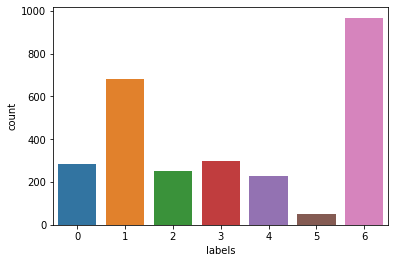

In [ ]:
sns.countplot(df_categories['labels']);

## Training using Huggingface API

In [ ]:
df_categories_selected = df_categories
def combine_features(row):
  return '<s>'.join(row.drop(['text','keyword','span_start','span_finish','pcl_category','labels'],axis=0).apply(str).values)
df_categories_selected['combined_features'] = df_categories_selected.apply(combine_features, axis = 1)
#['par_id','art_id',	'text', 'keyword',	'country_code', 'span_start', 'span_finish', 'span_text', 'pcl_category', 'number_of_annotators']

In [ ]:
df_categories['span_text'].duplicated().value_counts()

False    2547
True      213
Name: span_text, dtype: int64

In [ ]:
def combine_features(row) :
  return '</s>'.join(row.drop(['index'],axis=0).apply(str).values)
df_pcl_test['combined_features'] = df_pcl_test.apply(combine_features, axis = 1)
df_pcl_test.head(10)

,index,paragraph_id,keyword,country_code,paragraph,combined_features
0,t_0,@@7258997,vulnerable,us,"In the meantime , conservatives are working to...",@@7258997</s>vulnerable</s>us</s>In the meanti...
1,t_1,@@16397324,women,pk,In most poor households with no education chil...,@@16397324</s>women</s>pk</s>In most poor hous...
2,t_2,@@16257812,migrant,ca,The real question is not whether immigration i...,@@16257812</s>migrant</s>ca</s>The real questi...
3,t_3,@@3509652,migrant,gb,"In total , the country 's immigrant population...","@@3509652</s>migrant</s>gb</s>In total , the c..."
4,t_4,@@477506,vulnerable,ca,"Members of the church , which is part of Ken C...",@@477506</s>vulnerable</s>ca</s>Members of the...
5,t_5,@@1797863,women,tz,"To ensure that "" Priority Agriculture Programm...","@@1797863</s>women</s>tz</s>To ensure that "" P..."
6,t_6,@@17227791,immigrant,us,The deportees stepped off their flight from El...,@@17227791</s>immigrant</s>us</s>The deportees...
7,t_7,@@8213205,disabled,pk,PIMS staffer who raped disabled girl at ICU wa...,@@8213205</s>disabled</s>pk</s>PIMS staffer wh...
8,t_9,@@1750742,vulnerable,lk,"I conclude , Yes , the general FEELING generat...","@@1750742</s>vulnerable</s>lk</s>I conclude , ..."
9,t_10,@@21002471,women,ke,After enduring discrimination in the all-male ...,@@21002471</s>women</s>ke</s>After enduring di...


In [ ]:
valid_size = 279
duplicate = df_categories_selected[df_categories['span_text'].duplicated()]
none_duplicate = df_categories_selected.drop(duplicate.index, axis=0)
df_categories_valid = none_duplicate.sample(valid_size, random_state = 42)
df_categories_train = df_categories_selected.drop(df_categories_valid.index, axis=0)
df_categories_train

,par_id,art_id,text,keyword,country_code,span_start,span_finish,span_text,pcl_category,number_of_annotators,labels,combined_features
0,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,201,236,put their situation in perspective,Authority_voice,2,0,4046<s>@@14767805<s>us<s>put their situation i...
1,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,240,274,help them communicate with others,Unbalanced_power_relations,2,6,4046<s>@@14767805<s>us<s>help them communicate...
2,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,274,300,who could provide support,Unbalanced_power_relations,1,6,4046<s>@@14767805<s>us<s>who could provide sup...
3,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,384,434,plan for their needs and the needs of their child,Authority_voice,2,0,4046<s>@@14767805<s>us<s>plan for their needs ...
4,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,0,35,We also know that they can benefit,Unbalanced_power_relations,1,6,4046<s>@@14767805<s>us<s>We also know that the...
...,...,...,...,...,...,...,...,...,...,...,...,...
2755,10070,@@15573661,Fern ? ndez was a well-known philanthropist wh...,disabled,ng,0,210,Fern ? ndez was a well-known philanthropist wh...,Unbalanced_power_relations,1,6,10070<s>@@15573661<s>ng<s>Fern ? ndez was a we...
2756,6484,@@2559173,"Touched much by their plight , Commanding Offi...",homeless,lk,0,29,Touched much by their plight,Compassion,1,1,6484<s>@@2559173<s>lk<s>Touched much by their ...
2757,6484,@@2559173,"Touched much by their plight , Commanding Offi...",homeless,lk,31,315,Commanding Officer and all ranks of the 7 Sri ...,Unbalanced_power_relations,1,6,6484<s>@@2559173<s>lk<s>Commanding Officer and...
2758,6249,@@1947926,She reiterated her ministry 's commitment to p...,women,gh,153,205,gave a strong indication of hope for Ghanaian ...,Unbalanced_power_relations,1,6,6249<s>@@1947926<s>gh<s>gave a strong indicati...


In [ ]:
df_categories_valid

,par_id,art_id,text,keyword,country_code,span_start,span_finish,span_text,pcl_category,number_of_annotators,labels,combined_features
62,5996,@@2822899,Real poverty of Britain : Shocking images of U...,poor-families,gb,135,198,glimpse into the harrowing day-to-day for poor...,Compassion,1,1,5996<s>@@2822899<s>gb<s>glimpse into the harro...
213,10468,@@16753236,""" Anja Ringgren Loven I ca n't find a word to ...",hopeless,in,79,187,May God almighty keep blessing you and always ...,Unbalanced_power_relations,1,6,10468<s>@@16753236<s>in<s>May God almighty kee...
2497,6910,@@19027470,World Refugee Day is marked on June 20 every y...,refugee,gh,0,18,World Refugee Day,Shallow_solution,2,4,6910<s>@@19027470<s>gh<s>World Refugee Day<s>2
256,7153,@@60096684,"He stayed true to his promise , and at the ope...",homeless,pk,75,153,he brought a lot of homeless from the park to ...,Unbalanced_power_relations,2,6,7153<s>@@60096684<s>pk<s>he brought a lot of h...
2567,7735,@@4940628,King Wenceslas is probably standing on an elev...,hopeless,lk,339,389,The benevolent King is deeply moved by this sight,Unbalanced_power_relations,2,6,7735<s>@@4940628<s>lk<s>The benevolent King is...
...,...,...,...,...,...,...,...,...,...,...,...,...
34,773,@@1759840,Sheepherding in America has always been an imm...,immigrant,us,62,122,"too dirty , too cold and too lonely for anyone...",Compassion,2,1,"773<s>@@1759840<s>us<s>too dirty , too cold an..."
2082,7888,@@50041353,Kate has also worked to help Liverpool 's home...,homeless,gb,61,87,by handing out gift boxes,Shallow_solution,2,4,7888<s>@@50041353<s>gb<s>by handing out gift b...
908,1510,@@23162563,""" Someone has to be there to care , "" he says ...",vulnerable,ie,2,34,Someone has to be there to care,Compassion,2,1,1510<s>@@23162563<s>ie<s>Someone has to be the...
2120,7095,@@1737715,Battling homelessness through fashion is the b...,homeless,us,0,185,Battling homelessness through fashion is the b...,Unbalanced_power_relations,2,6,7095<s>@@1737715<s>us<s>Battling homelessness ...


In [ ]:
from datasets import Dataset
raw_datasets_valid = Dataset.from_pandas(df_categories_valid[['combined_features','labels']])
raw_datasets_train = Dataset.from_pandas(df_categories_train[['combined_features','labels']])
raw_datasets_test  = Dataset.from_pandas(df_pcl_test[['combined_features']])
raw_datasets_train, raw_datasets_valid

(Dataset({
     features: ['combined_features', 'labels', '__index_level_0__'],
     num_rows: 2481
 }), Dataset({
     features: ['combined_features', 'labels', '__index_level_0__'],
     num_rows: 279
 }))

Because the labels are imbalanced, we split the data set in a stratified fashion, using this as the class labels.

In [ ]:
# FIXME: Ali - Idea: Try zero shot, few shot, fine-tuning with GPT-3
from transformers import AutoTokenizer
model_name = 'roberta-large'
# model_name = 'bert-base-uncased'
# model_name = 'roberta-large-openai-detector' #FIXME: Ali - Idea: Try other larger models
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["combined_features"], padding="max_length", truncation=True)

tokenized_datasets_train = raw_datasets_train.map(tokenize_function, batched=True)
tokenized_datasets_valid = raw_datasets_valid.map(tokenize_function, batched=True)

tokenized_datasets_train

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Dataset({
    features: ['combined_features', 'labels', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 2481
})

In [ ]:
#This two line is from Task 1 code
tokenized_datasets_train = tokenized_datasets_train.remove_columns(["__index_level_0__", 'combined_features'])
tokenized_datasets_valid = tokenized_datasets_valid.remove_columns(["__index_level_0__", 'combined_features'])
tokenized_datasets_train, tokenized_datasets_valid

(Dataset({
     features: ['labels', 'input_ids', 'attention_mask'],
     num_rows: 2481
 }), Dataset({
     features: ['labels', 'input_ids', 'attention_mask'],
     num_rows: 279
 }))

In [ ]:
tokenized_datasets_test = raw_datasets_test.map(tokenize_function, batched=True)
tokenized_datasets_test = tokenized_datasets_test.remove_columns(['combined_features'])
tokenized_datasets_test

  0%|          | 0/4 [00:00<?, ?ba/s]

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 3832
})

In [ ]:
# small_dataset_size = 10
# small_train_dataset = tokenized_datasets_train.shuffle(seed=42).select(range(small_dataset_size))
# small_eval_dataset = tokenized_datasets_valid.shuffle(seed=42).select(range(small_dataset_size))
full_train_dataset = tokenized_datasets_train
full_eval_dataset = tokenized_datasets_valid
full_test_dataset = tokenized_datasets_test

In [ ]:
# model_bert = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
# model_bert

In [ ]:
# model_bert()

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=7)

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classif

In [ ]:
from datasets import load_metric, list_metrics
# list_metrics()

In [ ]:
from transformers import TrainingArguments
run_name = 'roberta_large_lr1e-5'
# https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainingArguments
training_args = TrainingArguments(run_name,
                                  num_train_epochs=4,
                                  save_total_limit = 2,
                                  #report_to=['tensorboard','wandb'],
                                  learning_rate=1e-5,
                                  evaluation_strategy= "epoch",
                                  per_device_train_batch_size=2,
                                  gradient_accumulation_steps=1,
                                  warmup_steps=1000,
                                  lr_scheduler_type='linear') 
# , resume_from_checkpoint='full_roberta_lr5e-5' , per_device_train_batch_size=4
# FIXME: Ali - Idea: use schedulers with different learning_rate (higher or lower) 
# TODO: Ali - add Gdrive to save checkpoints in gdrive
# TODO: Ali - use `resume_from_checkpoint` to load model from last checkpoint

In [ ]:
 from transformers import Trainer
import numpy as np
from datasets import load_metric

f1_metric = load_metric('f1')

# accuracy_metric = load_metric("accuracy")

Downloading:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

In [ ]:
# model.roberta.encoder

In [ ]:
# df_pcl_valid['labels'].values[:10]

In [ ]:
# f1_metric.compute(predictions=y_pred.predictions.argmax(axis=1), references=df_pcl_valid['labels'].values[10:20])

In [ ]:
from sklearn.metrics import f1_score
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return {'f1': f1_score(labels, predictions, average='macro')}
    # return f1_metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model, args=training_args,
    train_dataset=full_train_dataset,
    eval_dataset=full_eval_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
!nvidia-smi

Mon Jan 24 19:15:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W /  70W |   2848MiB / 15109MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Wandb accces code: 6eac997ed11cad663510778e5e1c33388cdac6c5
# swswswswsw

In [ ]:
# import gc
# gc.collect()
# torch.cuda.empty_cache() sssssssssss

In [ ]:
trainer.train()

***** Running training *****
  Num examples = 2481
  Num Epochs = 4
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 4964


Epoch,Training Loss,Validation Loss,F1
1,1.493800,1.278342,0.288951
2,1.305400,1.160692,0.513771
3,1.029100,1.500535,0.561328
4,0.840400,1.840352,0.509927


Saving model checkpoint to roberta_large_lr1e-5/checkpoint-500
Configuration saved in roberta_large_lr1e-5/checkpoint-500/config.json
Model weights saved in roberta_large_lr1e-5/checkpoint-500/pytorch_model.bin
Saving model checkpoint to roberta_large_lr1e-5/checkpoint-1000
Configuration saved in roberta_large_lr1e-5/checkpoint-1000/config.json
Model weights saved in roberta_large_lr1e-5/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 279
  Batch size = 8
Saving model checkpoint to roberta_large_lr1e-5/checkpoint-1500
Configuration saved in roberta_large_lr1e-5/checkpoint-1500/config.json
Model weights saved in roberta_large_lr1e-5/checkpoint-1500/pytorch_model.bin
Deleting older checkpoint [roberta_large_lr1e-5/checkpoint-500] due to args.save_total_limit
Saving model checkpoint to roberta_large_lr1e-5/checkpoint-2000
Configuration saved in roberta_large_lr1e-5/checkpoint-2000/config.json
Model weights saved in roberta_large_lr1e-5/checkpoint-2000/pyt

TrainOutput(global_step=4964, training_loss=1.2131551946967385, metrics={'train_runtime': 4072.1394, 'train_samples_per_second': 2.437, 'train_steps_per_second': 1.219, 'total_flos': 9248643093123072.0, 'train_loss': 1.2131551946967385, 'epoch': 4.0})

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 279
  Batch size = 8


{'epoch': 4.0,
 'eval_f1': 0.5099265413775199,
 'eval_loss': 1.8403524160385132,
 'eval_runtime': 27.4848,
 'eval_samples_per_second': 10.151,
 'eval_steps_per_second': 1.273}

In [ ]:
y_pred = trainer.predict(full_test_dataset)

***** Running Prediction *****
  Num examples = 3832
  Batch size = 8


In [ ]:
y_pred.predictions.argmax(axis=1)

In [ ]:
df_preds=pd.DataFrame(y_pred.label_ids)
df_preds

""


In [ ]:
y = y_pred.predictions.argmax(axis=1)
y, len(y)

In [ ]:
np.savetxt('y_pred.csv', y, fmt='%s')

In [ ]:
df_preds=pd.DataFrame(y)
df_preds.columns = ['label']
df_preds.sum(), df_preds

In [ ]:
from google.colab import files
files.download('y_pred.csv') 

In [ ]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [ ]:
labels2file([[k] for k in list(df_preds['label'])], 'task2.txt')

In [ ]:
files.download('task2.txt') 

In [ ]:
#Zip submission File
!zip submission.zip task1.txt

In [ ]:
files.download('submission.zip') 

In [ ]:
# del trainer
# import gc
# gc.collect()
# torch.cuda.empty_cache()

In [ ]:
# # For WandB results checkout https://wandb.ai/alipanahi/pcl-binary 
# %tensorboard --logdir "roberta_large_lr5e-5"

In [ ]:
# mkdir -p /content/drive/MyDrive/full_roberta_lr5e-5/checkpoint-5500/

In [ ]:
# cp -r /content/full_roberta_lr5e-5/checkpoint-5500/ /content/drive/MyDrive/full_roberta_lr5e-5/checkpoint-5500/

In [ ]:
# import wandb
# wandb.init(project='pcl-binary')

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(df_pcl_valid['labels'].values, df_preds.values, target_names=['0','1']))

In [ ]:
# from sklearn.metrics import f1_score
# f1_score(df_pcl_valid['labels'].values, df_preds.values, average='macro')

In [ ]:
# df_pcl_valid['labels'].values[:10]